<a href="https://colab.research.google.com/github/G-habib/pfe_models/blob/main/DL_Prediction_PNDM_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
file_url = 'https://raw.githubusercontent.com/G-habib/pfe_models/main/PNDM.csv'

PNDM_dataset=pd.read_csv(file_url)

In [3]:
PNDM_dataset.head()

,Age,HbA1c,Genetic Info,Family History,Birth Weight,Developmental Delay,Insulin Level,PNDM
0,3,4.840927,Mutation,Yes,3.128268,No,5.585608,0
1,3,5.694742,Mutation,No,2.059342,No,3.141359,1
2,7,6.843595,No mutation,No,2.718667,Yes,4.639313,0
3,2,6.480186,No mutation,No,3.087017,No,6.217178,0
4,4,7.052861,Mutation,No,3.481472,No,3.368892,0


In [4]:
PNDM_dataset.shape

(100000, 8)

In [5]:
PNDM_dataset.describe()

,Age,HbA1c,Birth Weight,Insulin Level,PNDM
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,6.000500,6.996700,2.801585,5.003078,0.048220
std,3.166048,0.998358,0.500464,1.992177,0.214232
min,1.000000,2.830618,0.427123,-3.242078,0.000000
25%,3.000000,6.323205,2.463519,3.661212,0.000000
50%,6.000000,6.996069,2.800933,5.002304,0.000000
75%,9.000000,7.670997,3.139870,6.348078,0.000000
max,11.000000,11.315256,4.910420,13.304440,1.000000


In [6]:
PNDM_dataset['PNDM'].value_counts()

0    95178
1     4822
Name: PNDM, dtype: int64

<Axes: >

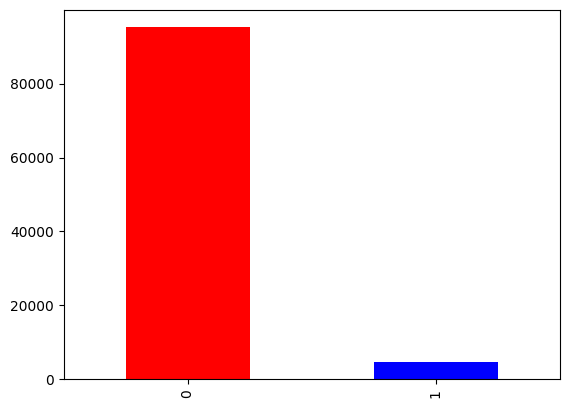

In [7]:
PNDM_dataset['PNDM'].value_counts().plot(kind='bar', color=['red', 'blue'])

In [8]:
PNDM_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  100000 non-null  int64  
 1   HbA1c                100000 non-null  float64
 2   Genetic Info         100000 non-null  object 
 3   Family History       100000 non-null  object 
 4   Birth Weight         100000 non-null  float64
 5   Developmental Delay  100000 non-null  object 
 6   Insulin Level        100000 non-null  float64
 7   PNDM                 100000 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 6.1+ MB


In [9]:
PNDM_dataset.drop_duplicates(keep='first', inplace=True)
PNDM_dataset

,Age,HbA1c,Genetic Info,Family History,Birth Weight,Developmental Delay,Insulin Level,PNDM
0,3,4.840927,Mutation,Yes,3.128268,No,5.585608,0
1,3,5.694742,Mutation,No,2.059342,No,3.141359,1
2,7,6.843595,No mutation,No,2.718667,Yes,4.639313,0
3,2,6.480186,No mutation,No,3.087017,No,6.217178,0
4,4,7.052861,Mutation,No,3.481472,No,3.368892,0
...,...,...,...,...,...,...,...,...
99995,9,7.810662,No mutation,Yes,2.031233,No,3.059450,0
99996,11,7.163781,Mutation,Yes,3.003822,No,2.891719,0
99997,10,5.521820,No mutation,No,3.798452,Yes,6.015360,0
99998,10,7.539210,No mutation,No,3.117501,No,4.128981,0


In [10]:
PNDM_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  100000 non-null  int64  
 1   HbA1c                100000 non-null  float64
 2   Genetic Info         100000 non-null  object 
 3   Family History       100000 non-null  object 
 4   Birth Weight         100000 non-null  float64
 5   Developmental Delay  100000 non-null  object 
 6   Insulin Level        100000 non-null  float64
 7   PNDM                 100000 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 6.9+ MB


In [11]:
#standardization
# normalisation of Genetic info, Family history, Developmental delay : into numerical values
cat_feature = ['Genetic Info', 'Family History', 'Developmental Delay']
dummy_PNDM_dataset = pd.get_dummies(PNDM_dataset[cat_feature])
PNDM_dataset = pd.concat([PNDM_dataset, dummy_PNDM_dataset],axis=1)
PNDM_dataset = PNDM_dataset.drop(cat_feature, axis=1)

PNDM_dataset.shape

(100000, 11)

In [12]:
PNDM_dataset.head()

,Age,HbA1c,Birth Weight,Insulin Level,PNDM,Genetic Info_Mutation,Genetic Info_No mutation,Family History_No,Family History_Yes,Developmental Delay_No,Developmental Delay_Yes
0,3,4.840927,3.128268,5.585608,0,1,0,0,1,1,0
1,3,5.694742,2.059342,3.141359,1,1,0,1,0,1,0
2,7,6.843595,2.718667,4.639313,0,0,1,1,0,0,1
3,2,6.480186,3.087017,6.217178,0,0,1,1,0,1,0
4,4,7.052861,3.481472,3.368892,0,1,0,1,0,1,0


In [13]:
# separating the data and label
X = PNDM_dataset.drop(columns = 'PNDM', axis=1)
Y = PNDM_dataset['PNDM']

In [14]:
X

,Age,HbA1c,Birth Weight,Insulin Level,Genetic Info_Mutation,Genetic Info_No mutation,Family History_No,Family History_Yes,Developmental Delay_No,Developmental Delay_Yes
0,3,4.840927,3.128268,5.585608,1,0,0,1,1,0
1,3,5.694742,2.059342,3.141359,1,0,1,0,1,0
2,7,6.843595,2.718667,4.639313,0,1,1,0,0,1
3,2,6.480186,3.087017,6.217178,0,1,1,0,1,0
4,4,7.052861,3.481472,3.368892,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
99995,9,7.810662,2.031233,3.059450,0,1,0,1,1,0
99996,11,7.163781,3.003822,2.891719,1,0,0,1,1,0
99997,10,5.521820,3.798452,6.015360,0,1,1,0,0,1
99998,10,7.539210,3.117501,4.128981,0,1,1,0,1,0


In [15]:
Y

0        0
1        1
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: PNDM, Length: 100000, dtype: int64

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2)

In [17]:
# standardization of X data
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

(7604, 10)


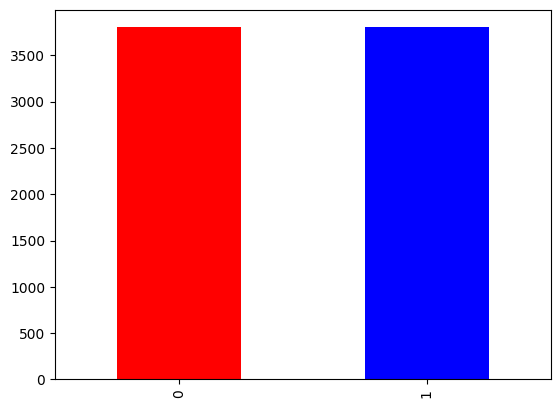

In [18]:
# Balancing the Dataset
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=101)
x_under, y_under = undersample.fit_resample(X_train_std, Y_train)

print(x_under.shape)
y_under.value_counts().plot(kind='bar', color=['red', 'blue'])
plt.show()

In [19]:
import tensorflow as tf
tf.random.set_seed(3) # generate random values of paramaters every time the neural network runs
from tensorflow import keras

In [20]:
print(tf.__version__)

2.15.0


In [21]:
# setting up the layers of Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(10,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(30, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [22]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
# training the Meural Network

history = model.fit(x_under, y_under, validation_split=0.2, epochs=10)

Epoch 1/10
191/191 [==============================] - 1s 3ms/step - loss: 0.2257 - accuracy: 0.9408 - val_loss: 0.0970 - val_accuracy: 0.9928
Epoch 2/10
191/191 [==============================] - 1s 3ms/step - loss: 0.0734 - accuracy: 0.9768 - val_loss: 0.0424 - val_accuracy: 0.9967
Epoch 3/10
191/191 [==============================] - 0s 2ms/step - loss: 0.0566 - accuracy: 0.9818 - val_loss: 0.0771 - val_accuracy: 0.9849
Epoch 4/10
191/191 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 0.9841 - val_loss: 0.0653 - val_accuracy: 0.9888
Epoch 5/10
191/191 [==============================] - 0s 2ms/step - loss: 0.0389 - accuracy: 0.9867 - val_loss: 0.0555 - val_accuracy: 0.9908
Epoch 6/10
191/191 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 0.9885 - val_loss: 0.0498 - val_accuracy: 0.9947
Epoch 7/10
191/191 [==============================] - 0s 2ms/step - loss: 0.0276 - accuracy: 0.9910 - val_loss: 0.0397 - val_accuracy: 0.9941
Epoch 

In [24]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

625/625 [==============================] - 1s 1ms/step - loss: 0.0128 - accuracy: 0.9955
0.9955499768257141


In [32]:
# trying the prediction
input_data = (3,5.694742026537993,2.0593417801955525,3.1413594690450974,1,0,1,0,1,0)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

# converting the prediction probability to 0 , 1 labels
prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The patient does not have PNDM')

else:
  print('The patient have PNDM')

1/1 [==============================] - 0s 20ms/step
[[0.0086187 0.9812979]]
[1]
The patient have PNDM


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
